In [82]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import warnings as wr
wr.filterwarnings("ignore") #to ignore the warnings

In [83]:
df_raw = pd.read_csv(r"C:\Users\T2ABIZZ\Documents\Datasets\IT_SALARY_SURVEY\IT_Salary_Survey_EU _2020.csv")
df = df_raw.copy()
df.dtypes

Timestamp                                                                                                                   object
Age                                                                                                                        float64
Gender                                                                                                                      object
City                                                                                                                        object
Position                                                                                                                    object
Total years of experience                                                                                                   object
Years of experience in Germany                                                                                              object
Seniority level                                                                    

as we can see there is columns that is object and should be float, So we must convert them.

# Cleaning the dataset

In [ ]:
df = df_raw.replace(',', '.', regex=True)

In [105]:
a = pd.to_numeric(df["Years of experience in Germany"], errors='coerce')
idx = a.isna()
df[idx]

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
343,24/11/2020 17:43:34,45.0,Male,Munich,Frontend Developer,3,< 1,Senior,Javascript / Typescript,NaN,...,NaN,25,Full-time employee,Unlimited contract,Russian,11-50,Startup,Yes,NaN,NaN
392,24/11/2020 19:14:03,37.0,Male,Zurich,Project manager,20,4 (in Switzerland). 0 (in Germany),Middle,NaN,NaN,...,10000,25,Full-time employee,Unlimited contract,English,1000+,Consulting / Agency,No,NaN,300
618,25/11/2020 14:56:08,23.0,Male,Berlin,Dana Analyst,4,4 month,Middle,NaN,Python. SQL,...,NaN,26,Full-time employee,Unlimited contract,English,11-50,Product,No,NaN,NaN
750,26/11/2020 10:07:39,25.0,Female,Tampere (Finland),computer vision researcher,3,3 months,Junior,Python,Python. Tensorflow. Theano. Pytorch,...,NaN,30,Full-time employee,Temporary contract,English,51-100,Science Institute,No,NaN,NaN
847,27/11/2020 14:14:20,28.0,Male,Warsaw. Poland,Software Engineer,6,3 (in Poland),Middle,C#,Javascript / Typescript. .NET. SQL,...,3900,26,Full-time employee,Unlimited contract,English,51-100,Consulting / Agency,No,NaN,0
867,27/11/2020 18:27:25,23.0,Male,Munich,ML Engineer,1,<1,Junior,Python,C/C++. SQL. Google Cloud. Docker,...,NaN,NaN,Full-time employee,Unlimited contract,English,101-1000,Product,Yes,NaN,NaN
883,28/11/2020 05:36:11,27.0,Male,Hamburg,Backend Developer,3,⁰,Middle,.net,Javascript / Typescript. .NET. SQL. Docker,...,NaN,NaN,Part-time employee,Temporary contract,English,11-50,Consulting / Agency,No,NaN,NaN
1052,02/12/2020 10:35:10,22.0,Female,Eindhoven,Frontend Developer,2,-,Junior,JS,Javascript / Typescript. SQL. Docker,...,-,24,Full-time employee,Unlimited contract,English,11-50,Product,Laid off for a bit,32.0,-
1089,05/12/2020 12:18:41,31.0,Male,Hamburg,Data Scientist,6 (not as a data scientist. but as a lab scien...,6 (not as a data scientist. but as a lab scien...,Middle,Python,Python. R. SQL,...,NaN,NaN,Full-time employee,Unlimited contract,German,1000+,Product,No,NaN,NaN
1209,28/12/2020 22:24:47,24.0,Female,Munich,Software Engineer,less than year,less than year,student,Python. database technologies,Python. Java / Scala. SQL. AWS,...,NaN,10,Part-time employee,Unlimited contract,English,11-50,Startup,No,NaN,NaN


In [99]:
df['Total years of experience'].fillna(df['Years of experience in Germany'], inplace=True)
df['Years of experience in Germany'].fillna(df['Total years of experience'], inplace=True)

In [104]:
df["Years of experience in Germany"].isna().sum()

0

In [103]:
df.dropna(subset=["Total years of experience","Years of experience in Germany"],how="all",inplace=True)

In [15]:

df = df.astype({
    "Total years of experience":"float64",
    "Years of experience in Germany":"float64",
    "Total years of experience":'float64',
    "Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country":"float64",
    "Main language at work":'category',

 })

ValueError: could not convert string to float: '1,5': Error while type casting for column 'Total years of experience'

In [16]:
print(df.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [17]:
numerical_feautures=df.select_dtypes(include=[np.number])
numerical_feautures.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1226.0,3.250979e+01,5.663804e+00,20.0,29.0,32.0,35.0,6.900000e+01
Yearly brutto salary (without bonus and stocks) in EUR,1253.0,8.027904e+07,2.825061e+09,10001.0,58800.0,70000.0,80000.0,1.000000e+11
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,885.0,6.322459e+05,1.680508e+07,11000.0,55000.0,65000.0,75000.0,5.000000e+08
"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week",373.0,1.296783e+01,1.527517e+01,0.0,0.0,0.0,30.0,4.000000e+01


as we can see there is some outliers in Yearly brutto salary , Let's drop it!

In [18]:
Q1 = np.percentile(df['Yearly brutto salary (without bonus and stocks) in EUR'], 25, method='midpoint')
Q3 = np.percentile(df['Yearly brutto salary (without bonus and stocks) in EUR'], 75, method='midpoint')
IQR = Q3 - Q1
upper=Q3+1.5*IQR
lower=Q1-1.5*IQR
upper_array = np.where(df['Yearly brutto salary (without bonus and stocks) in EUR']>=upper)[0]
lower_array = np.where(df['Yearly brutto salary (without bonus and stocks) in EUR']<=lower)[0]
print(upper_array)
df.drop(index=upper_array, inplace=True)
df.drop(index=lower_array, inplace=True)

[   2   35  107  131  141  152  186  192  193  272  279  318  392  441
  473  491  494  511  528  529  543  558  559  573  574  576  630  641
  683  691  706  727  751  778  804  833  837  838  853  855  865  958
  966  967  971  993 1008 1046 1051 1085 1142 1223 1242]


In [8]:
percentage=df.isna().sum()/len(df)*100
percentage

Timestamp                                                                                                                   0.000000
Age                                                                                                                         1.344086
Gender                                                                                                                      0.448029
City                                                                                                                        0.000000
Position                                                                                                                    0.179211
Total years of experience                                                                                                   0.000000
Years of experience in Germany                                                                                              0.000000
Seniority level                                                      

In [9]:
df.isnull().sum()

Timestamp                                                                                                                    0
Age                                                                                                                         15
Gender                                                                                                                       5
City                                                                                                                         0
Position                                                                                                                     2
Total years of experience                                                                                                    0
Years of experience in Germany                                                                                               0
Seniority level                                                                                                

# Observation
- Age varies from 20 to 66 and the mean age is 32
- 

In [10]:
df.duplicated().sum()

0

# What question do we want to ask of the data?
- What is the distribution of ages among the respondents?
- How is the gender distribution in the dataset?
- What are the different cities represented in the dataset?
- How many vacation days do respondents typically have?
- What is the main language spoken at work for respondents?
- Does total years of experience increase salary?



In [13]:
df['Age'].describe()

count    1226.000000
mean       32.509788
std         5.663804
min        20.000000
25%        29.000000
50%        32.000000
75%        35.000000
max        69.000000
Name: Age, dtype: float64

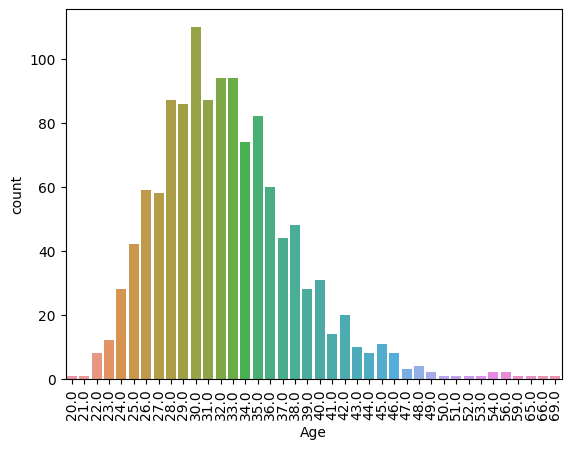

In [39]:
ax = sns.countplot(x="Age",data=df)
a=ax.set_xticklabels(ax.get_xticklabels(),rotation=90)


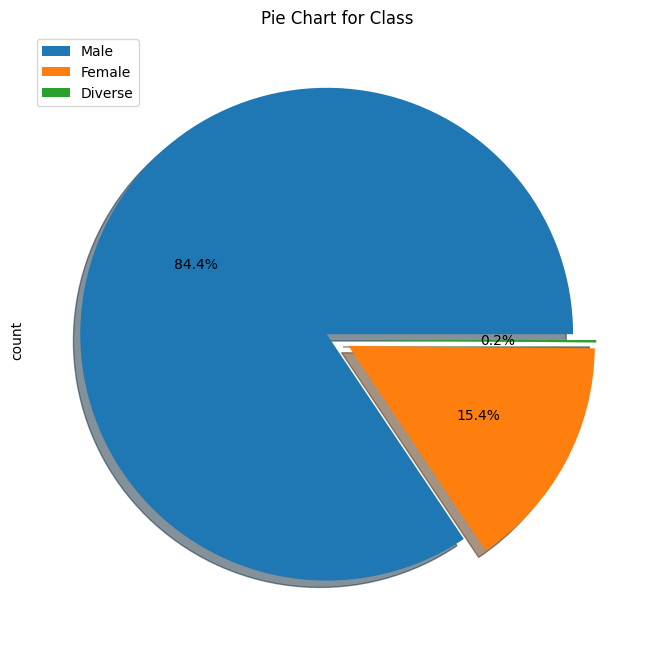

In [53]:
df["Gender"].value_counts().plot.pie(explode=[0.05, 0.05,0.05], autopct='%1.1f%%',labels=['','',''], shadow=True, figsize=(8,8))
plt.title('Pie Chart for Class')
plt.legend(loc='upper left',labels=df['Gender'].value_counts().index)
plt.show()

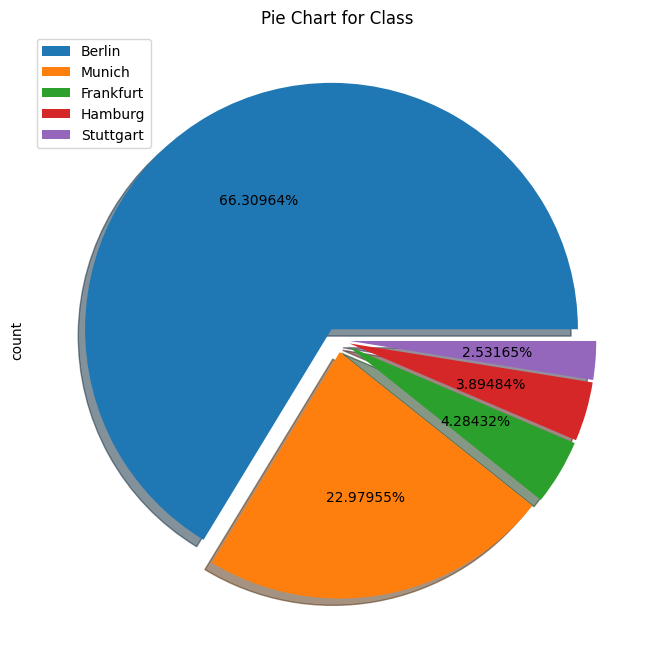

In [50]:
df["City"].value_counts().iloc[:5].plot.pie(explode=[0.05, 0.05,0.05,0.05,0.05],autopct='%1.5f%%',shadow=True,labels=['']*5, figsize=(8,8))
plt.title('Pie Chart for Class')
plt.legend(loc='upper left',labels=df['City'].value_counts().iloc[:5].index)
plt.show()

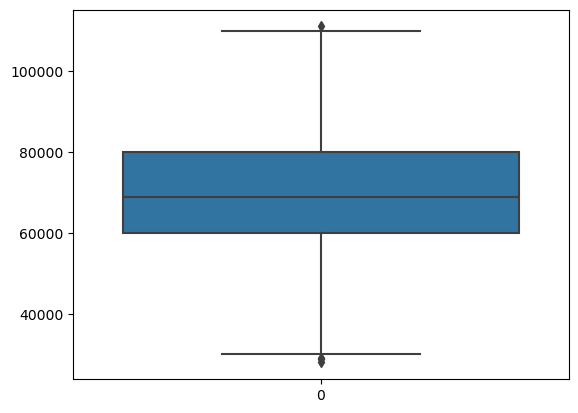

In [20]:

sns.boxplot(df["Yearly brutto salary (without bonus and stocks) in EUR"])
plt.show()